# Optimization Project

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from google.colab import data_table # Enables rendering of pandas dataframes into interactive displays
data_table.enable_dataframe_formatter()

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers
from tensorflow.random import set_seed


In [ ]:
# !pip install -U pymoo

In [ ]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from pymoo.core.problem import Problem


from pymoo.core.problem import ElementwiseProblem
from pymoo.core.variable import Real, Integer, Choice, Binary

from pymoo.operators.sampling.rnd import IntegerRandomSampling

from pymoo.util.display.column import Column
from pymoo.util.display.output import Output
from pymoo.core.callback import Callback

from pymoo.algorithms.moo.moead import MOEAD
from pymoo.util.ref_dirs import get_reference_directions

from pymoo.indicators.igd import IGD
from pymoo.indicators.hv import HV


## Load Data

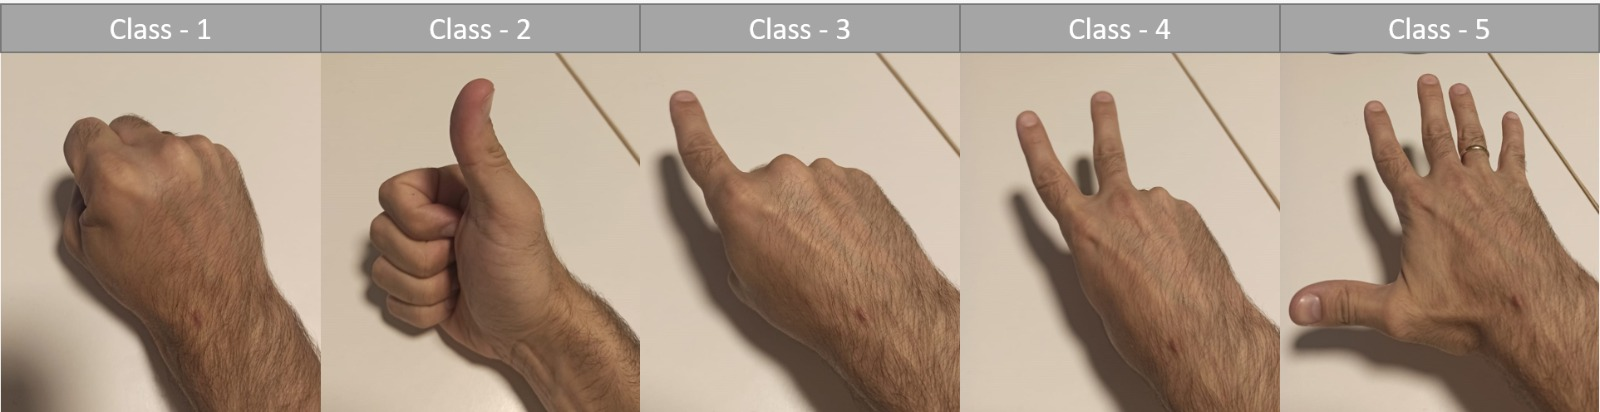

In [ ]:
from IPython.display import Image

Image(filename = f'WhatsApp Image 2022-12-11 at 15.35.55.jpeg', width = 1000, height = 300)

In [ ]:
# load the dataset
train_path = "train_data_norm.csv"
test_path = "test_data_norm.csv"
train_df = read_csv(train_path)
test_df = read_csv(test_path)

In [ ]:
train_df.iloc[:,1:].head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,labels
0,0.777778,0.921875,0.654206,0.565517,0.594595,0.802083,0.847162,0.377358,0.446429,0.195719,...,0.660920,0.615819,0.255319,0.496183,0.331707,0.148014,0.498834,0.253472,0.108025,0
1,0.777778,0.927083,0.682243,0.565517,0.574324,0.802083,0.851528,0.377358,0.452381,0.195719,...,0.678161,0.638418,0.239362,0.484733,0.329268,0.144404,0.498834,0.222222,0.111111,0
2,0.777778,0.932292,0.691589,0.572414,0.574324,0.802083,0.851528,0.381132,0.446429,0.198777,...,0.683908,0.638418,0.244681,0.488550,0.326829,0.148014,0.498834,0.222222,0.108025,0
3,0.777778,0.932292,0.682243,0.572414,0.574324,0.802083,0.851528,0.381132,0.452381,0.201835,...,0.689655,0.644068,0.244681,0.488550,0.329268,0.148014,0.501166,0.222222,0.104938,0
4,0.785185,0.932292,0.682243,0.572414,0.574324,0.802083,0.851528,0.381132,0.452381,0.198777,...,0.672414,0.638418,0.244681,0.488550,0.331707,0.151625,0.501166,0.222222,0.108025,0


In [ ]:
train_df.iloc[:,1:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29989 entries, 0 to 29988
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       29989 non-null  float64
 1   1       29989 non-null  float64
 2   2       29989 non-null  float64
 3   3       29989 non-null  float64
 4   4       29989 non-null  float64
 5   5       29989 non-null  float64
 6   6       29989 non-null  float64
 7   7       29989 non-null  float64
 8   8       29989 non-null  float64
 9   9       29989 non-null  float64
 10  10      29989 non-null  float64
 11  11      29989 non-null  float64
 12  12      29989 non-null  float64
 13  13      29989 non-null  float64
 14  14      29989 non-null  float64
 15  15      29989 non-null  float64
 16  16      29989 non-null  float64
 17  17      29989 non-null  float64
 18  18      29989 non-null  float64
 19  19      29989 non-null  float64
 20  20      29989 non-null  float64
 21  21      29989 non-null  float64
 22

In [ ]:
train_df.iloc[:,1:].describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,labels
count,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,...,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000
mean,0.544960,0.688247,0.540248,0.523526,0.507787,0.612537,0.748747,0.404003,0.408470,0.546064,...,0.619088,0.615725,0.500555,0.473215,0.661102,0.544085,0.563738,0.428091,0.322564,2.000033
std,0.223028,0.168670,0.219905,0.209107,0.236347,0.216479,0.146647,0.184760,0.156300,0.167351,...,0.194738,0.156412,0.183368,0.211727,0.141931,0.185983,0.198199,0.258725,0.200038,1.414249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385185,0.562500,0.336449,0.351724,0.297297,0.458333,0.681223,0.264151,0.315476,0.425076,...,0.494253,0.508475,0.382979,0.328244,0.585366,0.397112,0.410256,0.225694,0.182099,1.000000
50%,0.533333,0.708333,0.570093,0.537931,0.520270,0.614583,0.772926,0.392453,0.386905,0.547401,...,0.649425,0.610169,0.478723,0.484733,0.682927,0.527076,0.536131,0.326389,0.280864,2.000000
75%,0.740741,0.828125,0.719626,0.696552,0.675676,0.807292,0.860262,0.524528,0.470238,0.663609,...,0.764368,0.734463,0.622340,0.633588,0.763415,0.714801,0.703963,0.649306,0.419753,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [ ]:
# Reduction and shuffle the data
train_df = train_df.iloc[:,1:]
test_df = test_df.iloc[:,1:]
train_data = pd.DataFrame(train_df.iloc[0,:])
test_data = pd.DataFrame(test_df.iloc[0,:])
train_data = train_data.T
test_data = test_data.T
for i in range(len(train_df)):
  if(i%30 == 0):
    train_data = train_data.append(train_df.iloc[i,:])
for j in range(len(test_df)):
  if(j%30 == 0):
    test_data = test_data.append(test_df.iloc[j,:])
train_data = train_data.iloc[1:,:]
test_data = test_data.iloc[1:,:]
#shuffle:
train_data = train_data.sample(frac=1).reset_index(drop=True)
test_data = test_data.sample(frac=1).reset_index(drop=True)
# train data = 1000 samples
# test data = 250 samples

In [ ]:
# encode the data
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values

X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1000, 28) (1000,) (250, 28) (250,)


## Optimization problem

### Objective Function

In [ ]:
# Objective Function - build neural network, fit the net, and check accuracy on test data
def obj_func(n_first_layer ,n_hidden ,s_hidden): 
  set_seed(5)
  # define model
  model = Sequential()
  model.add(Dense(n_first_layer, input_dim=28, activation='relu', input_shape=(28,))) #,kernel_initializer=initializers.Zeros
  for i in range(n_hidden):
    model.add(Dense(s_hidden, activation='relu'))
  model.add(Dense(5, activation='softmax'))
  # model.summary()
  trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
  nonTrainableParams = np.sum([np.prod(v.get_shape()) for v in model.non_trainable_weights])
  totalParams = trainableParams + nonTrainableParams

  # compile the model
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
  # fit the model
  model.fit(X_train, y_train, epochs=50, batch_size=20, verbose=0)
  # evaluate the model
  loss, acc = model.evaluate(X_test, y_test, verbose=0)
  
  return(totalParams,round(acc*100,2))

### Define utility classes

In [ ]:
# print in every iteration at the minimize
class MyOutput(Output):

    def __init__(self):
        super().__init__()
        self.acc_ = Column("best acc", width=10)
        self.acc_w = Column("worst acc", width=10)
        self.par_ = Column("best params", width=10)
        self.par_w = Column("worst params", width=10)
        self.columns += [self.acc_, self.acc_w, self.par_, self.par_w]

    def update(self, algorithm):
        super().update(algorithm)
        res = algorithm.pop.get("F")
        res = np.round(res, 2)
        self.acc_.set(f'{np.min(res[:,0]):.2f}')
        self.acc_w.set(f'{np.max(res[:,0]):.2f}')
        self.par_.set(f'{np.min(res[:,1]):.0f}')
        self.par_w.set(f'{np.max(res[:,1]):.0f}')
        plt.scatter(res[:,0],res[:,1])
        plt.draw() # show()


In [ ]:
# save data for plots after the minimize
class MyCallback(Callback):

    def __init__(self) -> None:
        super().__init__()
        self.data["best"] = []
        self.index = 1
        self.data_history = pd.DataFrame(columns=['Gen' ,'Design_1', 'Design_2', 'Design_3', 'Objective_1', 'Objective_2'])

    def notify(self, algorithm):
        self.data["best"].append(algorithm.pop.get("F").min())
        self.data_history = self.data_history.append({'Gen': self.index, 'Design_1':  np.round(algorithm.pop.get("X")[:,0],0),
                                                      'Design_2':  np.round(algorithm.pop.get("X")[:,1],0),
                                                      'Design_3':  np.round(algorithm.pop.get("X")[:,2],0),
                                                      'Objective_1':  algorithm.pop.get("F")[:,0],
                                                      'Objective_2':  algorithm.pop.get("F")[:,1]}, ignore_index=True)
        self.index = self.index + 1

### Define The Problem

* design parameters = s_first_layer [1,14], n_hidden [1,50] , s_hidden[1,100]

* objective = total parameters[41,<500K] , accuracy[0,100]

In [ ]:
# problem class
class Net_Struct_Problem(Problem):
      def __init__(self, **kwargs):
          super().__init__(n_var=3, n_obj=2, n_ieq_constr=0,xl=[1, 1, 1], xu=[14,50,100], vtype=int)
          
      def _evaluate(self, X, out, *args, **kwargs):
          num_params = []
          acc_ = []
          X = np.round(X)
          for x in X:
            f, n, s = int(x[0]), int(x[1]), int(x[2])
            t_param, acc = obj_func(f, n, s)
            acc_.append(acc)
            num_params.append(t_param)
          acc_ = np.array(acc_)
          num_params = np.array(num_params)
          out['F'] =  [-acc_, num_params]

### Define algorithm parameters

In [ ]:
num_of_generations = 1
population_size = 10

### Run The NSGA2 Algorithm (1 gen 10 pop)

In [ ]:
problem = Net_Struct_Problem()

algorithm = NSGA2(pop_size=population_size)

stop_criteria = ('n_gen', num_of_generations)

results_NSGA2 = minimize(
    problem=problem,
    algorithm=algorithm,
    callback=MyCallback(),
    output=MyOutput(),
    termination=stop_criteria,
    save_history=True,
    verbose=True
)

### Data

In [ ]:
def from_pymoo_to_des_obj(results): 
  des_1 = results.algorithm.callback.data_history['Design_1']
  des_1 = des_1[0][:]
  des_2 = results.algorithm.callback.data_history['Design_2']
  des_2 = des_2[0][:]
  des_3 = results.algorithm.callback.data_history['Design_3']
  des_3 = des_3[0][:]
  obj_1 = results.algorithm.callback.data_history['Objective_1']
  obj_1 = obj_1[0][:]
  obj_2 = results.algorithm.callback.data_history['Objective_2']
  obj_2 = obj_2[0][:]
  return des_1,des_2,des_3,obj_1,obj_2

In [ ]:
des_1,des_2,des_3,obj_1,obj_2 = from_pymoo_to_des_obj(results_NSGA2) 


### Design Space

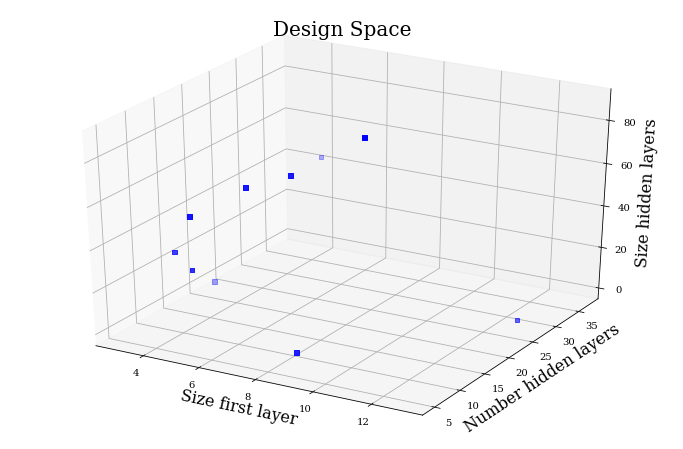

In [ ]:
# Create the figure and axes for the 3D plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(des_1, des_2, des_3,color=['blue'], marker="s")
ax.set_xlabel('Size first layer',fontsize=16)
ax.set_ylabel('Number hidden layers',fontsize=16)
ax.set_zlabel('Size hidden layers',fontsize=16)
ax.set_title('Design Space',fontsize=20) #NSGA2\n
plt.savefig('nsga_des.png')
plt.show()

### Objective Space

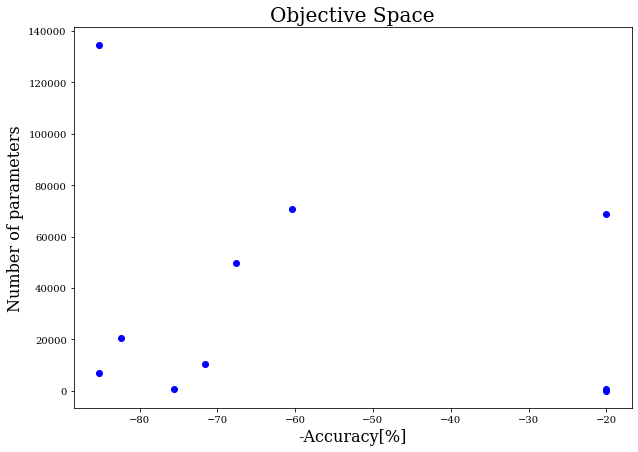

In [ ]:
# Create the figure and axes for the 3D plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.scatter(obj_1,obj_2, color=['blue'])
ax.set_xlabel('-Accuracy[%]',fontsize=16)
ax.set_ylabel('Number of parameters',fontsize=16)
ax.set_title('Objective Space',fontsize=20)
plt.savefig('nsga_obj.png')
plt.show()

### Pareto Front

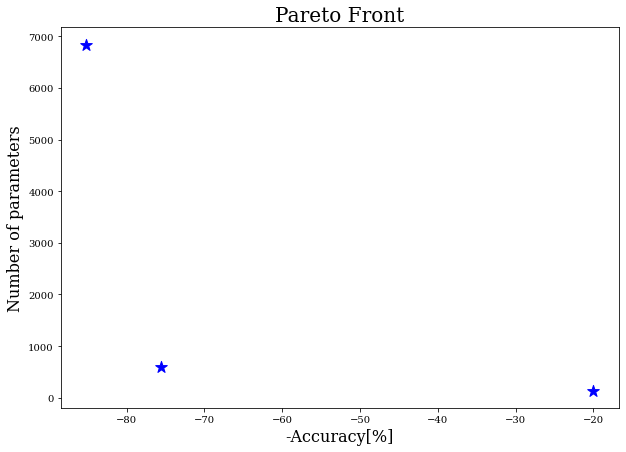

In [ ]:
# Create the figure and axes for the 3D plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.scatter(results_NSGA2.F[:,0],results_NSGA2.F[:,1], color=['blue'], marker="*", s=150)
ax.set_xlabel('-Accuracy[%]',fontsize=16)
ax.set_ylabel('Number of parameters',fontsize=16)
ax.set_title('Pareto Front',fontsize=20)
plt.savefig('nsga_pareto.png')
plt.show()


### Check another algorithm MOEAD (1 gen)

In [ ]:
problem = Net_Struct_Problem()

ref_dirs = get_reference_directions("uniform", 2, n_partitions=9)

algorithm_m = MOEAD(
    ref_dirs,
    n_neighbors=15,
    prob_neighbor_mating=0.7,
)

results_MOEAD = minimize(problem,
               algorithm_m,
               termination=stop_criteria,
               # seed=1,
               callback=MyCallback(),
               save_history=True,
               verbose=True)

Scatter().add(results_MOEAD.F).show()
# Scatter().add(ref_dirs).show()

### Data

In [ ]:
des_1,des_2,des_3,obj_1,obj_2 = from_pymoo_to_des_obj(results_MOEAD) 

### Design Space

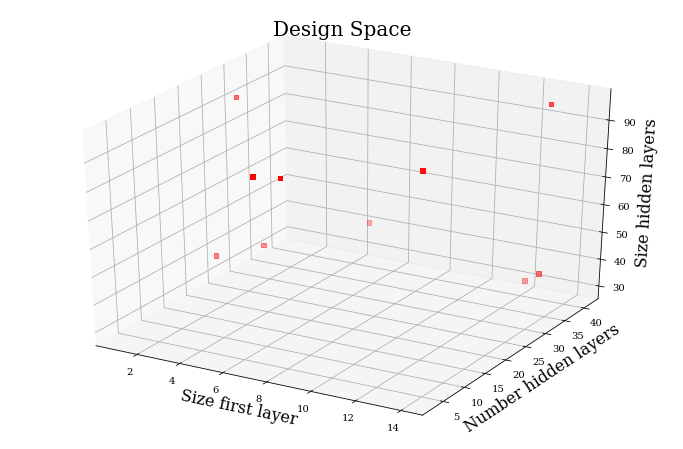

In [ ]:
# Create the figure and axes for the 3D plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(des_1, des_2, des_3,color=['red'], marker="s")
ax.set_xlabel('Size first layer',fontsize=16)
ax.set_ylabel('Number hidden layers',fontsize=16)
ax.set_zlabel('Size hidden layers',fontsize=16)
ax.set_title('Design Space',fontsize=20)
plt.savefig('moead_des.png')
plt.show()

### Objective Space

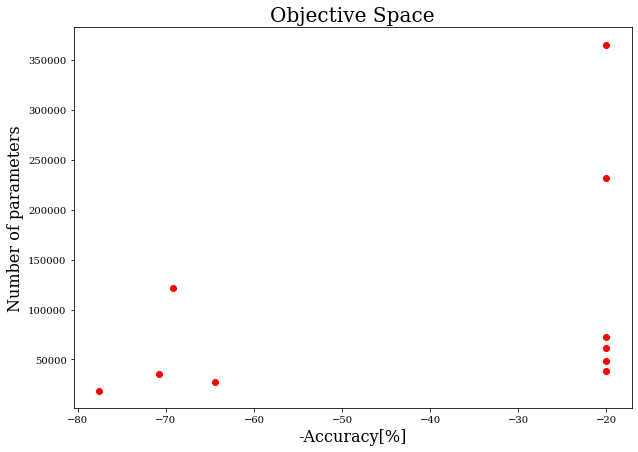

In [ ]:
# Create the figure and axes for the 3D plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.scatter(obj_1,obj_2, color=['red'])
ax.set_xlabel('-Accuracy[%]',fontsize=16)
ax.set_ylabel('Number of parameters',fontsize=16)
ax.set_title('Objective Space',fontsize=20)
plt.savefig('moead_obj.png')

plt.show()

### Pareto Front

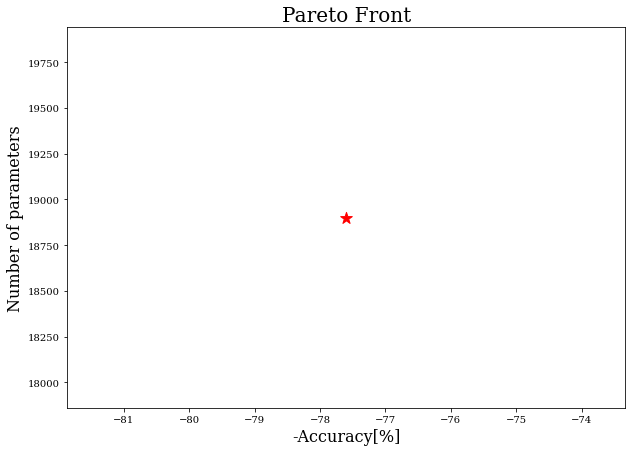

In [ ]:
# Create the figure and axes for the 3D plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.scatter(results_MOEAD.F[:,0],results_MOEAD.F[:,1], color=['red'], marker="*", s=150)
ax.set_xlabel('-Accuracy[%]',fontsize=16)
ax.set_ylabel('Number of parameters',fontsize=16)
ax.set_title('Pareto Front',fontsize=20)
plt.savefig('moead_pareto.png')
plt.show()

## Load all the runs data

In [ ]:
def open_res(run_number):
  # Load the object from the file using pickle
  with open(f'res_moead_{run_number}.pkl', 'rb') as f:
    moead_data = pickle.load(f)
  # Load the object from the file using pickle
  with open(f'res_nsga_{run_number}.pkl', 'rb') as l:
    nsga_data = pickle.load(l)
  return nsga_data, moead_data

In [ ]:
with open('/content/res_nsga_long_run.pkl', 'rb') as f:
  long_data = pickle.load(f)
with open('res_nsga_long_run_2.pkl', 'rb') as f:
  long_data_2 = pickle.load(f)
with open('/content/res_nsga_3_obj.pkl', 'rb') as f:
  long_3_obj = pickle.load(f)
  

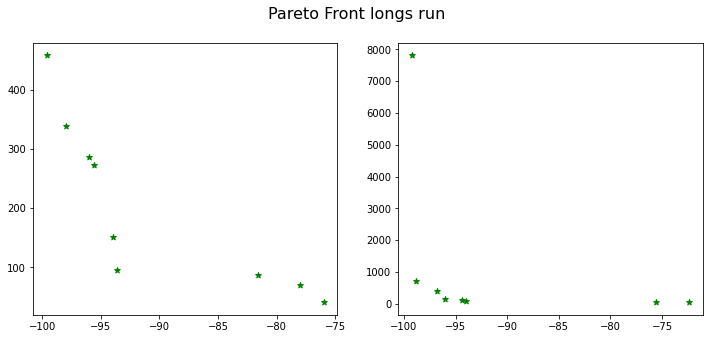

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,5))
axs[0].scatter(long_data.F[:,0],long_data.F[:,1], color=['green'], marker="*")
axs[1].scatter(long_data_2.F[:,0],long_data_2.F[:,1], color=['green'], marker="*")
fig.suptitle('Pareto Front longs run', fontsize=16)
plt.show()

### Pareto Front

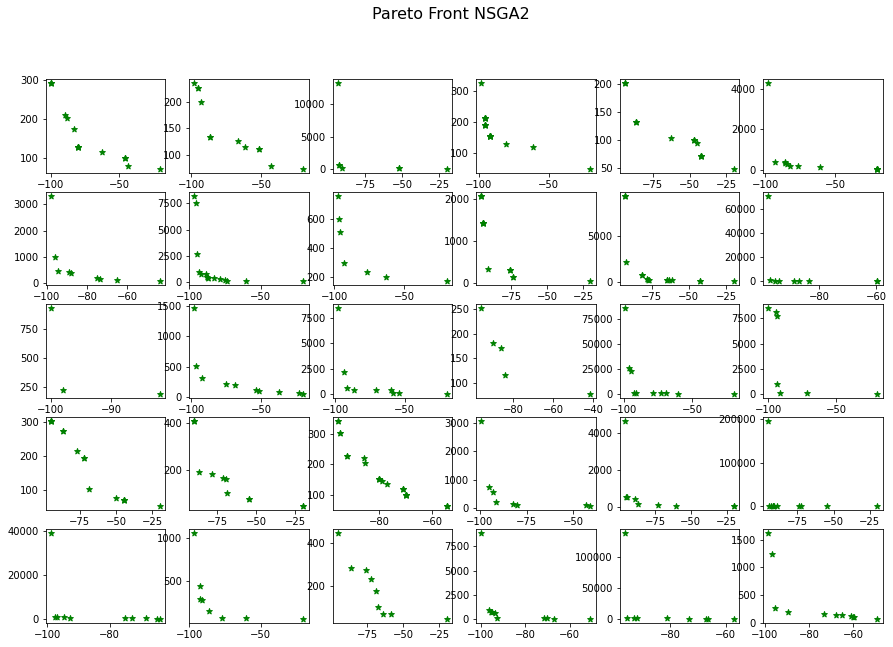

In [ ]:
fig, axs = plt.subplots(5,6, figsize=(15,10))
k = 0
for i in range(5):
  for j in range(6):
    nsga_data,moead_data = open_res(k)
    axs[i,j].scatter(nsga_data.F[:,0],nsga_data.F[:,1], color=['green'], marker="*")
    k += 1
fig.suptitle('Pareto Front NSGA2', fontsize=16)
plt.show()

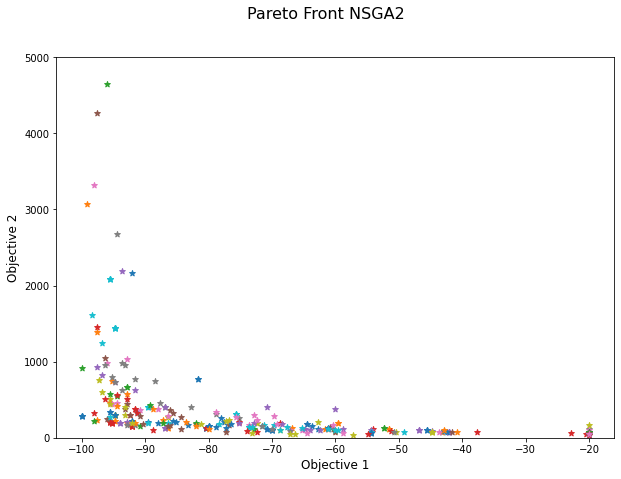

In [ ]:
fig, axs = plt.subplots(figsize=(10,7))
k = 0
for i in range(5):
  for j in range(6):
    nsga_data,moead_data = open_res(k)
    axs.scatter(nsga_data.F[:,0],nsga_data.F[:,1], marker="*")
    k += 1
fig.suptitle('Pareto Front NSGA2', fontsize=16)
axs.set_ylim([0,5000])
axs.set_xlabel("Objective 1", fontsize = 12)
axs.set_ylabel("Objective 2", fontsize = 12)

plt.show()

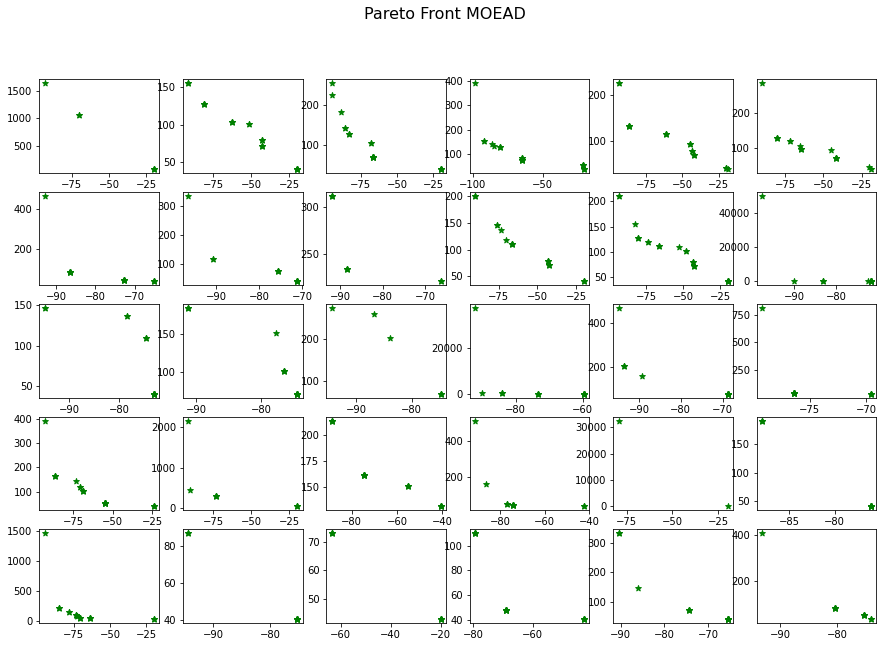

In [ ]:
fig, axs = plt.subplots(5,6, figsize=(15,10))
k = 0
for i in range(5):
  for j in range(6):
    nsga_data,moead_data = open_res(k)
    axs[i,j].scatter(moead_data.F[:,0],moead_data.F[:,1], color=['green'], marker="*")
    k += 1
fig.suptitle('Pareto Front MOEAD', fontsize=16)

plt.show()

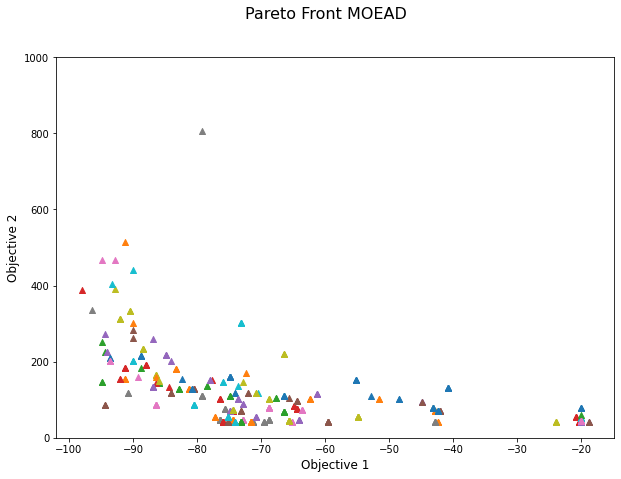

In [ ]:
fig, axs = plt.subplots(figsize=(10,7))
k = 0
for i in range(5):
  for j in range(6):
    nsga_data,moead_data = open_res(k)
    axs.scatter(moead_data.F[:,0],moead_data.F[:,1], marker="^")
    k += 1
fig.suptitle('Pareto Front MOEAD', fontsize=16)
axs.set_ylim([0,1000])
axs.set_xlabel("Objective 1", fontsize = 12)
axs.set_ylabel("Objective 2", fontsize = 12)
plt.show()

### United Pareto Front

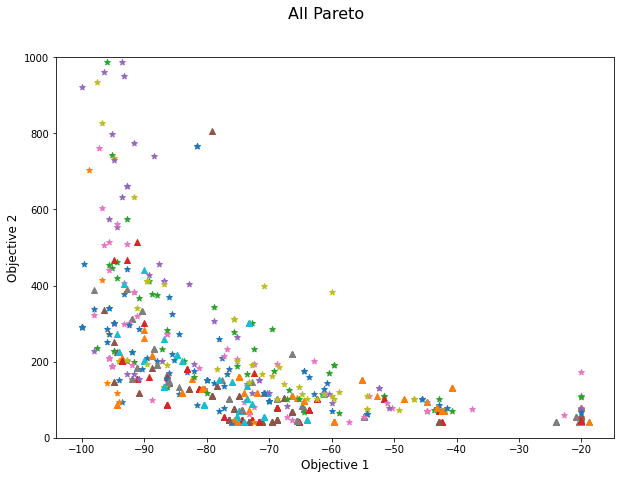

In [ ]:
# show united pareto
fig, axs = plt.subplots(figsize=(10,7))
k = 0
all_points = pd.DataFrame(columns=['Acc' ,'Params', 'des_1', 'des_2', 'des_3'])
for i in range(5):
  for j in range(6):
    nsga_data,moead_data = open_res(k)
    axs.scatter(nsga_data.F[:,0],nsga_data.F[:,1], marker="*")
    axs.scatter(moead_data.F[:,0],moead_data.F[:,1], marker="^")
    for l in range(len(nsga_data.F[:,0])):
      all_points = all_points.append({'Acc': nsga_data.F[l,0], 'Params':  nsga_data.F[l,1],
                                      'des_1':  np.round(nsga_data.X[l,0],0), 'des_2':  np.round(nsga_data.X[l,1],0),
                                      'des_3':  np.round(nsga_data.X[l,2],0)}, ignore_index=True)
    for p in range(len(moead_data.F[:,0])):
      all_points = all_points.append({'Acc': moead_data.F[p,0], 'Params':  moead_data.F[p,1],
                                      'des_1':  np.round(moead_data.X[p,0],0), 'des_2':  np.round(moead_data.X[p,1],0),
                                      'des_3':  np.round(moead_data.X[p,2],0)}, ignore_index=True)
    k += 1

for l in range(len(long_data.F[:,0])):
  all_points = all_points.append({'Acc': long_data.F[l,0], 'Params':  long_data.F[l,1], 
                                  'des_1':  np.round(long_data.X[l,0],0), 'des_2':  np.round(long_data.X[l,1],0),
                                  'des_3':  np.round(long_data.X[l,2],0)}, ignore_index=True)
for p in range(len(long_data_2.F[:,0])):
  all_points = all_points.append({'Acc': long_data_2.F[p,0], 'Params':  long_data_2.F[p,1],
                                  'des_1':  np.round(long_data_2.X[p,0],0), 'des_2':  np.round(long_data_2.X[p,1],0), 
                                  'des_3':  np.round(long_data_2.X[p,2],0)}, ignore_index=True)

axs.scatter(long_data.F[:,0],long_data.F[:,1], marker="*")
axs.scatter(long_data_2.F[:,0],long_data_2.F[:,1], marker="*")

fig.suptitle('All Pareto', fontsize=16)
axs.set_xlabel("Objective 1", fontsize = 12)
axs.set_ylabel("Objective 2", fontsize = 12)
axs.set_ylim([0,1000])
plt.show()

In [ ]:
all_points

,Acc,Params,des_1,des_2,des_3
0,-100.0,290.0,3.0,1.0,22.0
1,-100.0,290.0,3.0,1.0,22.0
2,-80.4,128.0,3.0,1.0,4.0
3,-80.4,128.0,3.0,1.0,4.0
4,-88.0,201.0,4.0,1.0,8.0
...,...,...,...,...,...
985,-94.4,119.0,3.0,1.0,3.0
986,-96.0,143.0,3.0,3.0,3.0
987,-96.8,415.0,7.0,2.0,9.0
988,-99.2,7812.0,11.0,2.0,78.0


In [ ]:
def pareto_front(points):
    pareto_points = []
    
    for point in points:
        is_pareto = True
        for other in points:
            if((point[0] != other[0] or point[1] != other[1]) and (point[0] >= other[0] and point[1] >= other[1])):
                is_pareto = False
                break
        if is_pareto:
            pareto_points.append(point)
    pareto_points = np.unique(np.array(pareto_points), axis=0)
    return pareto_points

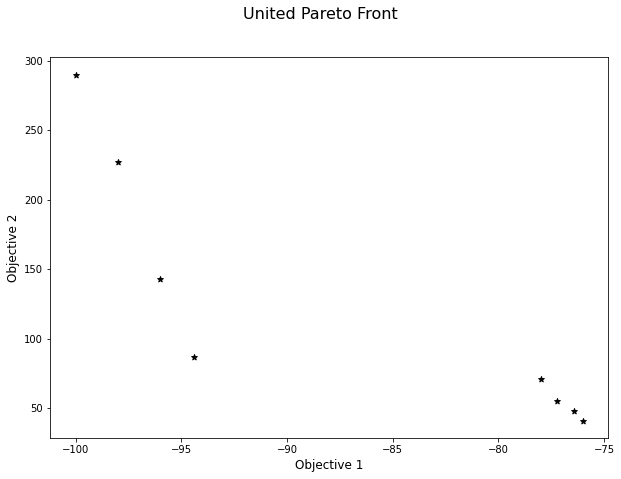

In [ ]:
poi = np.array(all_points)
pareto_points = pareto_front(poi)
fig, axs = plt.subplots(figsize=(10,7))
axs.scatter(pareto_points[:,0],pareto_points[:,1], color=['black'], marker="*")
fig.suptitle('United Pareto Front', fontsize=16)
axs.set_xlabel("Objective 1", fontsize = 12)
axs.set_ylabel("Objective 2", fontsize = 12)
plt.show()

In [ ]:
pareto_points

array([[-100. ,  290. ,    3. ,    1. ,   22. ],
       [ -98. ,  227. ,    6. ,    2. ,    3. ],
       [ -96. ,  143. ,    3. ,    3. ,    3. ],
       [ -94.4,   87. ,    2. ,    1. ,    3. ],
       [ -78. ,   71. ,    2. ,    1. ,    1. ],
       [ -77.2,   55. ,    1. ,    1. ,    3. ],
       [ -76.4,   48. ,    1. ,    1. ,    2. ],
       [ -76. ,   41. ,    1. ,    1. ,    1. ]])

### Metrics

In [ ]:
def pareto_front_spread(points):
  
    # Calculate the distance between all pairs of points
    distances = []
    for i in range(len(points)):
        for j in range(i+1, len(points)):
            d = np.linalg.norm(np.array(points[i]) - np.array(points[j]))
            distances.append(d)
    
    # Calculate the spread metric as the average distance between points
    spread = np.mean(distances)
    
    return spread

In [ ]:
def get_metrics(results, united_fornt, ref_point = np.array([-20, 1000])):

  ind_1 = IGD(results.F) # pf - single pareto front  
  igd = ind_1(united_fornt)

  ind_2 = HV(ref_point=ref_point)
  hv = ind_2(results.F)

  # calculate spread
  sp = pareto_front_spread(results.F)# /np.shape(results.F)

  # time
  time = results.exec_time/60 # min

  return igd, hv, sp ,time


In [ ]:
metrics_nsga = pd.DataFrame(columns=['IGD' ,'HV', 'SPREAD', 'TIME'])
metrics_moead = pd.DataFrame(columns=['IGD' ,'HV', 'SPREAD', 'TIME'])
united_fornt = pareto_points
for i in range(30):
  nsga_data,moead_data = open_res(i)
  igd, hv, sp ,time = get_metrics(nsga_data, united_fornt, ref_point = np.array([-20, 1000]))
  metrics_nsga = metrics_nsga.append({'IGD': igd, 'HV': hv, 'SPREAD': sp, 'TIME': time}, ignore_index=True)
  igd, hv, sp ,time = get_metrics(moead_data, united_fornt, ref_point = np.array([-20, 1000]))
  metrics_moead = metrics_moead.append({'IGD': igd, 'HV': hv, 'SPREAD': sp, 'TIME': time}, ignore_index=True)


### Metrics Statistic

In [ ]:
metrics_nsga

,IGD,HV,SPREAD,TIME
0,25.190392,68894.4,89.663660,41.813838
1,27.917401,68035.2,75.838859,38.387946
2,1980.744445,61281.6,3919.834991,49.173865
3,23.308062,67408.8,52.442044,38.401822
4,33.088666,65670.8,61.746820,47.484846
5,313.344441,59876.8,676.723379,45.996864
6,472.213766,61060.4,914.195887,36.938655
7,1322.339576,56896.4,2258.312833,31.556316
8,167.088807,58065.2,276.625040,30.525996
9,841.952642,57913.2,890.416000,29.372219


In [ ]:
metrics_moead

,IGD,HV,SPREAD,TIME
0,399.361607,0.0,673.012361,49.484956
1,37.279385,63632.4,53.548910,30.556569
2,26.787605,67196.8,65.833392,29.727450
3,32.226065,68598.0,69.153706,30.960574
4,33.112744,65280.4,61.058756,33.810084
5,33.862540,61592.4,55.440702,32.541557
6,13.981099,66410.0,55.869667,21.632449
7,9.716963,70281.6,57.927470,21.921216
8,20.794726,55474.4,46.656917,26.746250
9,36.414934,61692.4,61.511847,20.337495


In [ ]:
# statistic of the metrics
metrics_nsga.describe()

,IGD,HV,SPREAD,TIME
count,30.000000,30.000000,30.000000,30.000000
mean,2464.460824,62393.680000,4688.673907,33.763610
std,4804.346481,4597.911927,9376.198224,6.419642
min,23.308062,51786.800000,52.442044,20.327375
25%,47.149009,59999.900000,160.458690,30.387926
50%,387.127469,63059.600000,783.569690,32.217234
75%,1774.661474,65696.900000,3024.611656,36.804680
max,17925.640710,68894.400000,35899.322388,49.173865


In [ ]:
metrics_moead.describe()

,IGD,HV,SPREAD,TIME
count,30.000000,30.000000,30.000000,30.000000
mean,712.615075,58244.280000,1441.795783,26.957328
std,2957.196589,17136.355009,5944.820529,7.674433
min,0.640000,0.000000,17.090113,18.093724
25%,14.086130,58288.500000,52.987026,21.543749
50%,29.369893,64351.400000,61.285302,25.135103
75%,38.704486,65700.000000,77.348429,30.467744
max,16133.173203,70466.400000,32440.054017,49.484956


### Video 

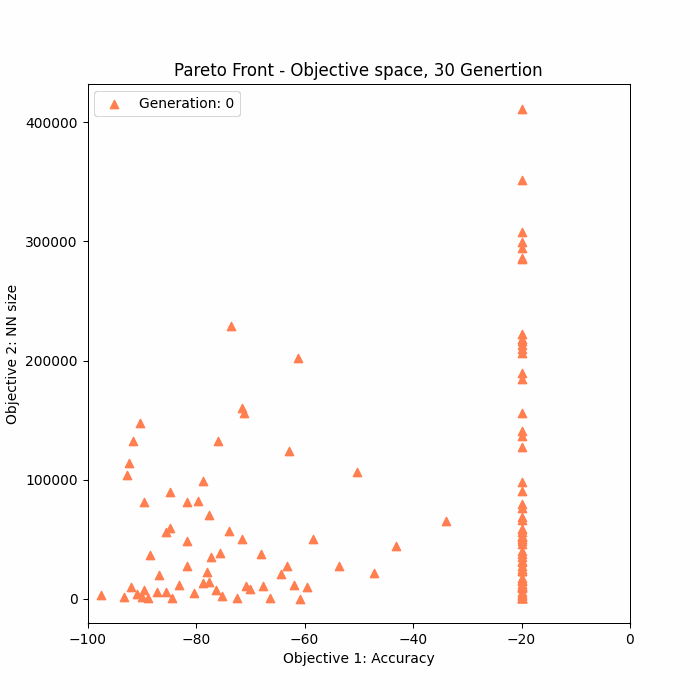

In [ ]:
Image(filename = f'/content/Pareto Video, long data.gif', width = 500, height = 500)

In [ ]:
# fig, axs = plt.subplots( figsize=(10,7))


# res_nsga_long_run,res_nsga_long_run_2 = open_res(1)
# axs.scatter(res_nsga_long_run_2.F[:,0],res_nsga_long_run_2.F[:,1], color=['green'], marker="*")

# fig.suptitle('Pareto Front NSGA2 30 generations', fontsize=16)
# plt.show()

In [ ]:
#download data from colab to computer

# df_vid = long_3_obj.algorithm.callback.data_history
# df_vid

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# import matplotlib.animation as animation

# obj_1 = df_vid['Objective_1']
# obj_2 = df_vid['Objective_2']

# #Clean data from space and get a list of values
# def obj_2_lst(obj):
#     obj_lst = []
#     for epoch in obj:
#         help_lst = []
#         curr_obj = epoch[1:-1].split(' ')
#         for word in curr_obj:
#             try:
#                 help_lst.append(float(word))
#             except:
#                 continue
#         obj_lst.append(help_lst)
#     obj_lst = np.array(obj_lst)    
#     return(obj_lst)

# obj_lst_1 = obj_2_lst(obj_1)
# obj_lst_2 = obj_2_lst(obj_2)

# #Define the Video parameters
# frames = len(obj_lst_1)
# points = len(obj_lst_1[0])

# # init the figure & size
# fig, ax = plt.subplots(figsize=(7,7))

# #Main function, plots a new plot for every itteration
# def update(i):
#     ax.clear()
#     ax.scatter(obj_lst_1[i], obj_lst_2[i], label ="Generation: {}".format(i), c = 'coral', marker = '^' )
#     ax.legend()
#     ax.set_xlabel('Objective 1: Accuracy')
#     ax.set_ylabel('Objective 2: NN size')
#     ax.set_title('Pareto Front - Objective space, 30 Genertion')
#     ax.set_xlim(-100, 0)
#     #ax.set_ylim(0, 250000)
    
# ani = animation.FuncAnimation(fig, update, frames=frames, interval=400)
# ani.save('Pareto Video, long data 2.gif', writer='pillow')
# plt.show()


## Build the best model and try it on all the data

- Design Parameters:
  - Size of first layer: 3
  - Number of hidden layers: 1
  - Size of hidden layers: 22
- Objectives on all the data:
  - Number of parameters: 290 
  - Test Accuracy: 97.7%

In [ ]:
# build the optimal model after the optimization 
def build_model(n_first_layer ,n_hidden ,s_hidden): 
  set_seed(5)
  # define model
  model = Sequential()
  model.add(Dense(n_first_layer, input_dim=28, activation='relu', input_shape=(28,))) #,kernel_initializer=initializers.Zeros
  for i in range(n_hidden):
    model.add(Dense(s_hidden, activation='relu'))
  model.add(Dense(5, activation='softmax'))
  # model.summary()
  trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
  nonTrainableParams = np.sum([np.prod(v.get_shape()) for v in model.non_trainable_weights])
  totalParams = trainableParams + nonTrainableParams

  # compile the model
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
  # fit the model
  model.fit(X_train, y_train, epochs=50, batch_size=20, verbose=0)
  # evaluate the model
  loss, acc = model.evaluate(X_test, y_test, verbose=0)
  
  return model, totalParams, round(acc*100,2)

In [ ]:
model, params, acc = build_model(3,1,22)
print(f'Number of parameterss:  {params}')
# print(f'Accuracy:  {acc}%')

Number of parameterss:  290.0


In [ ]:
all_X_test = test_df.iloc[:, :-1].values
all_y_test = test_df.iloc[:, -1].values
print(all_X_test.shape, all_y_test.shape)

(7498, 28) (7498,)


In [ ]:
loss, acc = model.evaluate(all_X_test, all_y_test)

235/235 [==============================] - 1s 2ms/step - loss: 0.1075 - accuracy: 0.9768


In [ ]:
# check the final model

class_names = ['class_0','class_1','class_2','class_3','class_4']
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

classifier = estimator(model, class_names)

 25/235 [==>...........................] - ETA: 0s 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


235/235 [==============================] - 0s 2ms/step


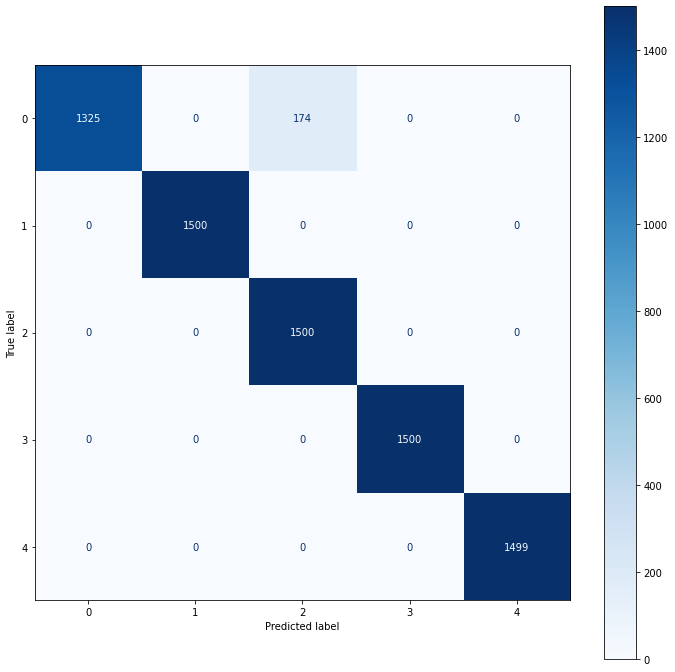

In [ ]:
from sklearn.metrics import plot_confusion_matrix
figsize = (12,12)
plot_confusion_matrix(estimator=classifier, X=all_X_test, y_true=all_y_test, cmap='Blues', normalize=None, ax=plt.subplots(figsize=figsize)[1])

## Run algo with 4 des and 3 obj


### Define The Problem

* design parameters = n_epochs[3,50], s_first_layer [1,14], n_hidden [1,50] , s_hidden[1,100]

* objective = total parameters[41,<500K] , accuracy[0,100], n_epochs[3,50]

In [ ]:
# Objective Function - build neural network, fit the net, and check accuracy on test data
def obj_func_2(n_first_layer ,n_hidden ,s_hidden, n_epochs): 
  set_seed(5)
  # define model
  model = Sequential()
  model.add(Dense(n_first_layer, input_dim=28, activation='relu', input_shape=(28,))) 
  for i in range(n_hidden):
    model.add(Dense(s_hidden, activation='relu'))
  model.add(Dense(5, activation='softmax'))
  # model.summary()
  trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
  nonTrainableParams = np.sum([np.prod(v.get_shape()) for v in model.non_trainable_weights])
  totalParams = trainableParams + nonTrainableParams

  # compile the model
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
  # fit the model
  model.fit(X_train, y_train, epochs=n_epochs, batch_size=20, verbose=0)
  # evaluate the model
  loss, acc = model.evaluate(X_test, y_test, verbose=0)
  
  return(totalParams, round(acc*100,2), n_epochs)


In [ ]:
# print in every iteration at the minimize
class MyOutput_2(Output):

    def __init__(self):
        super().__init__()
        self.acc_ = Column("best acc", width=10)
        self.acc_w = Column("worst acc", width=10)
        self.par_ = Column("best params", width=10)
        self.par_w = Column("worst params", width=10)
        self.ep_ = Column("best epochs", width=10)
        self.ep_w = Column("worst epochs", width=10)
        self.columns += [self.acc_, self.acc_w, self.par_, self.par_w, self.ep_, self.ep_w]

    def update(self, algorithm):
        super().update(algorithm)
        res = algorithm.pop.get("F")
        res = np.round(res, 2)
        self.acc_.set(f'{np.min(res[:,0]):.2f}')
        self.acc_w.set(f'{np.max(res[:,0]):.2f}')
        self.par_.set(f'{np.min(res[:,1]):.0f}')
        self.par_w.set(f'{np.max(res[:,1]):.0f}')
        self.ep_.set(f'{np.min(res[:,2]):.0f}')
        self.ep_w.set(f'{np.max(res[:,2]):.0f}')
        # plt.scatter(res[:,0],res[:,1])
        # plt.draw() # show()


In [ ]:
# save data for plots after the minimize
class MyCallback_2(Callback):

    def __init__(self) -> None:
        super().__init__()
        self.data["best"] = []
        self.index = 1
        self.data_history = pd.DataFrame(columns=['Gen' ,'Design_1', 'Design_2', 'Design_3', 'Design_4', 'Objective_1', 'Objective_2', 'Objective_3'])

    def notify(self, algorithm):
        self.data["best"].append(algorithm.pop.get("F").min())
        self.data_history = self.data_history.append({'Gen': self.index, 'Design_1':  np.round(algorithm.pop.get("X")[:,0],0),
                                                      'Design_2':  np.round(algorithm.pop.get("X")[:,1],0),
                                                      'Design_3':  np.round(algorithm.pop.get("X")[:,2],0),
                                                      'Design_4':  np.round(algorithm.pop.get("X")[:,3],0),
                                                      'Objective_1':  algorithm.pop.get("F")[:,0],
                                                      'Objective_2':  algorithm.pop.get("F")[:,1],
                                                      'Objective_3':  algorithm.pop.get("F")[:,2]}, ignore_index=True)
        self.index = self.index + 1


In [ ]:
# problem class
class Net_Struct_Problem_2(Problem):
      def __init__(self, **kwargs):
          super().__init__(n_var=4, n_obj=3, n_ieq_constr=0,xl=[3, 1, 1, 1], xu=[50, 14,50,100], vtype=int)
          
      def _evaluate(self, X, out, *args, **kwargs):
          num_params = []
          acc_ = []
          ep_ = []
          X = np.round(X)
          for x in X:
            e, f, n, s = int(x[0]), int(x[1]), int(x[2]), int(x[3])
            t_param, acc, ep = obj_func_2(f, n, s, e)
            acc_.append(acc)
            num_params.append(t_param)
            ep_.append(ep)
          acc_ = np.array(acc_)
          num_params = np.array(num_params)
          ep_ = np.array(ep_)
          out['F'] =  [-acc_, num_params, ep_]

In [ ]:
problem_2 = Net_Struct_Problem_2()

algorithm_n_2 = NSGA2(pop_size=60) # 60*5 = 50min

stop_criteria_2 = ('n_gen', 5)

results_NSGA2_3_obj = minimize(
    problem=problem_2,
    algorithm=algorithm_n_2,
    callback=MyCallback_2(),
    output=MyOutput_2(),
    termination=stop_criteria_2,
    save_history=True,
    verbose=True
)

n_gen  |  n_eval  |  best acc  | worst acc  | best params | worst params | best epochs | worst epochs
     1 |       60 |     -92.80 |     -20.00 |       1801 |     457253 |          5 |         50
     2 |      120 |     -92.80 |     -20.00 |       1399 |     230073 |          5 |         49
     3 |      180 |     -92.80 |     -20.00 |        507 |     154111 |          5 |         49
     4 |      240 |     -92.80 |     -20.00 |        289 |     154111 |          3 |         49
     5 |      300 |     -92.80 |     -20.00 |        289 |     136422 |          3 |         48


In [ ]:
def get_obj(res, i):  
  ddes_1 = res.algorithm.callback.data_history['Design_1']
  ddes_1 = ddes_1[i][:]
  ddes_2 = res.algorithm.callback.data_history['Design_2']
  ddes_2 = ddes_2[i][:]
  ddes_3 = res.algorithm.callback.data_history['Design_3']
  ddes_3 = ddes_3[i][:]
  ddes_4 = res.algorithm.callback.data_history['Design_4']
  ddes_4 = ddes_4[i][:]
  oobj_1 = res.algorithm.callback.data_history['Objective_1']
  oobj_1 = oobj_1[i][:]
  oobj_2 = res.algorithm.callback.data_history['Objective_2']
  oobj_2 = oobj_2[i][:]
  oobj_3 = res.algorithm.callback.data_history['Objective_3']
  oobj_3 = oobj_3[i][:]
  return oobj_1, oobj_2, oobj_3

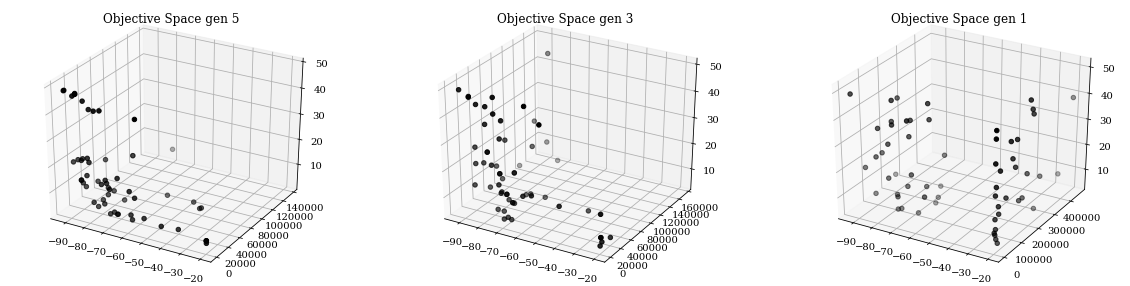

In [ ]:


fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(131,projection='3d')
oobj_1, oobj_2, oobj_3 = get_obj(results_NSGA2_3_obj, 4)
ax.scatter(oobj_1, oobj_2, oobj_3,color=['black'])
# ax.set_xlabel('-Accuracy[%]',fontsize=4)
# ax.set_ylabel('Number of parameters',fontsize=4)
# ax.set_zlabel('Number of epochs',fontsize=4)
ax.set_title('Objective Space gen 5',fontsize=12)
ax2 = fig.add_subplot(132,projection='3d')
oobj_1, oobj_2, oobj_3 = get_obj(results_NSGA2_3_obj, 2)
ax2.scatter(oobj_1, oobj_2, oobj_3,color=['black'])
ax2.set_title('Objective Space gen 3',fontsize=12)
ax3 = fig.add_subplot(133,projection='3d')
oobj_1, oobj_2, oobj_3 = get_obj(results_NSGA2_3_obj, 0)
ax3.scatter(oobj_1, oobj_2, oobj_3,color=['black'])
ax3.set_title('Objective Space gen 1',fontsize=12)


plt.show()


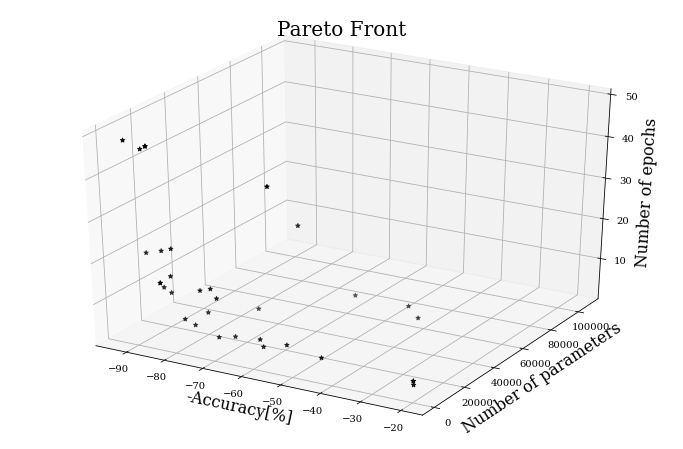

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(results_NSGA2_3_obj.F[:,0],results_NSGA2_3_obj.F[:,1], results_NSGA2_3_obj.F[:,2],color=['black'], marker="*")
ax.set_xlabel('-Accuracy[%]',fontsize=16)
ax.set_ylabel('Number of parameters',fontsize=16)
ax.set_zlabel('Number of epochs',fontsize=16)
ax.set_title('Pareto Front',fontsize=20)

plt.show()

### Video from long and big run

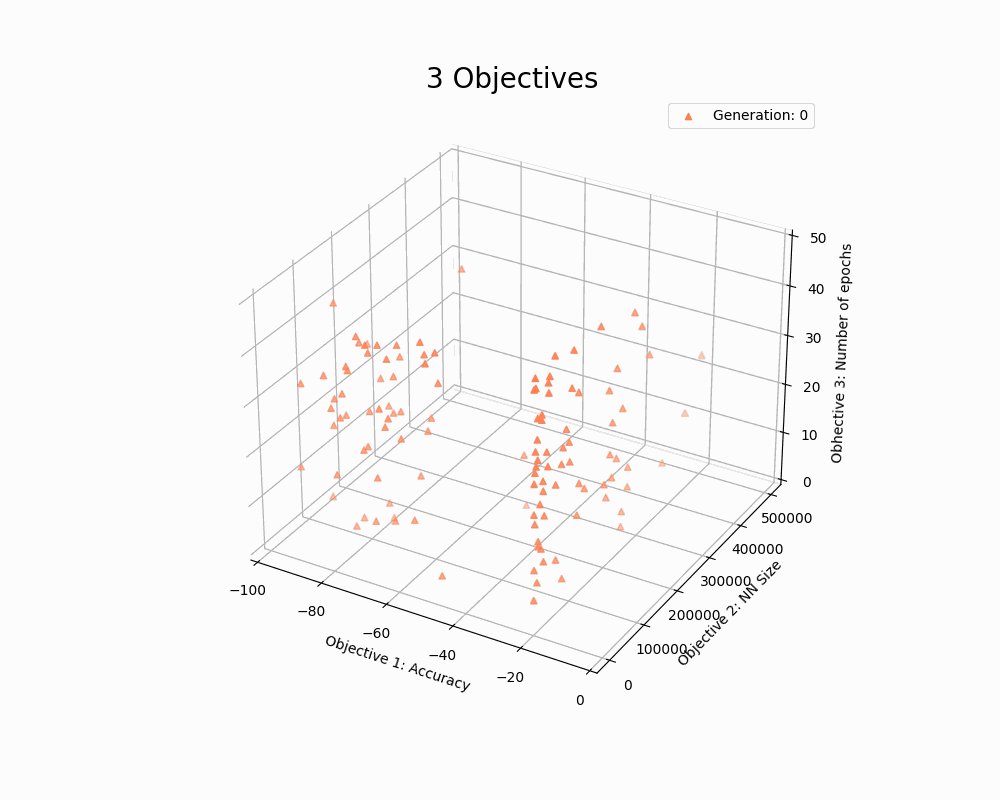

In [ ]:
Image(filename = f'/content/3 Objectives.gif', width = 600, height = 500)